# Load data

## Import libraries and set path 

In [1]:
import os
import sys
import pickle
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from read_functions import *

In [2]:
# add the data into the 'code' folder, make sure it is in the .gitignore file
# get your working directory
os.getcwd()

'c:\\Users\\Seif\\Desktop\\MA1\\ADA\\milestone_2\\ada-2023-project-adarescueteam\\code'

In [10]:
# add '\\data' to it and put in DATA_DIR to set your data directory
DATA_DIR = '.\\data' # add \\data

## Define functions to read in the data

### Read ratings

In [11]:
# read in the ratings
def read_ratings_txt(folder, file_name):
    data = []
    counter = 0

    with open(os.path.join(folder, file_name), 'rb') as file:
        rating_data = {}
        for line in file:
            line = line.strip()
            if line.startswith(b'beer_name:'):
                # check if dictionary is not empty
                if rating_data:
                    data.append(rating_data)
                rating_data = {'beer_name': line.split(b'beer_name:')[1].decode('utf-8')}
            elif line.startswith(b'beer_id:'):
                rating_data['beer_id'] = line.split(b'beer_id:')[1].decode('utf-8')
            elif line.startswith(b'brewery_name:'):
                rating_data['brewery_name'] = line.split(b'brewery_name:')[1].decode('utf-8')
            elif line.startswith(b'brewery_id:'):
                rating_data['brewery_id'] = line.split(b'brewery_id:')[1].decode('utf-8')
            elif line.startswith(b'style:'):
                rating_data['style'] = line.split(b'style:')[1].decode('utf-8')
            elif line.startswith(b'abv:'):
                rating_data['abv'] = line.split(b'abv:')[1].decode('utf-8')
            elif line.startswith(b'date:'):
                timestamp = float(line.split(b'date:')[1].decode('utf-8'))
                rating_data['date'] = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
            elif line.startswith(b'user_name:'):
                rating_data['user_name'] = line.split(b'user_name:')[1].decode('utf-8')
            elif line.startswith(b'user_id:'):
                rating_data['user_id'] = line.split(b'user_id:')[1].decode('utf-8')
            elif line.startswith(b'appearance:'):
                rating_data['appearance'] = line.split(b'appearance:')[1].decode('utf-8')
            elif line.startswith(b'aroma:'):
                rating_data['aroma'] = line.split(b'aroma:')[1].decode('utf-8')
            elif line.startswith(b'palate:'):
                rating_data['palate'] = line.split(b'palate:')[1].decode('utf-8')
            elif line.startswith(b'taste:'):
                rating_data['taste'] = line.split(b'taste:')[1].decode('utf-8')
            elif line.startswith(b'overall:'):
                rating_data['overall'] = line.split(b'overall:')[1].decode('utf-8')
            elif line.startswith(b'rating:'):
                rating_data['rating'] = line.split(b'rating:')[1].decode('utf-8')
            elif line.startswith(b'text:'):
                rating_data['text'] = line.split(b'text:')[1].decode('utf-8')
            elif line.startswith(b'review:'):
                rating_data['review'] = line.split(b'review:')[1].decode('utf-8')

            #counter += 1

            #if counter == 100000:  # limit amount of lines to read in
            #    break

    if rating_data:
        data.append(rating_data)

    ratings = pd.DataFrame(data)
    return ratings

### Read in reviews

In [12]:
# read in the reviews
def read_reviews_txt(folder, file_name):
    data = []
    counter = 0

    with open(os.path.join(folder, file_name), 'rb') as file:
        review_data = {}
        for line in file:
            line = line.strip()
            if line.startswith(b'beer_name:'):
                # check if dictionary is not empty
                if review_data:
                    data.append(review_data)
                review_data = {'beer_name': line.split(b'beer_name:')[1].decode('utf-8')}
            elif line.startswith(b'beer_id:'):
                review_data['beer_id'] = line.split(b'beer_id:')[1].decode('utf-8')
            elif line.startswith(b'brewery_name:'):
                review_data['brewery_name'] = line.split(b'brewery_name:')[1].decode('utf-8')
            elif line.startswith(b'brewery_id:'):
                review_data['brewery_id'] = line.split(b'brewery_id:')[1].decode('utf-8')
            elif line.startswith(b'style:'):
                review_data['style'] = line.split(b'style:')[1].decode('utf-8')
            elif line.startswith(b'abv:'):
                review_data['abv'] = line.split(b'abv:')[1].decode('utf-8')
            elif line.startswith(b'date:'):
                timestamp = float(line.split(b'date:')[1].decode('utf-8'))
                review_data['date'] = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
            elif line.startswith(b'user_name:'):
                review_data['user_name'] = line.split(b'user_name:')[1].decode('utf-8')
            elif line.startswith(b'user_id:'):
                review_data['user_id'] = line.split(b'user_id:')[1].decode('utf-8')
            elif line.startswith(b'appearance:'):
                review_data['appearance'] = line.split(b'appearance:')[1].decode('utf-8')
            elif line.startswith(b'aroma:'):
                review_data['aroma'] = line.split(b'aroma:')[1].decode('utf-8')
            elif line.startswith(b'palate:'):
                review_data['palate'] = line.split(b'palate:')[1].decode('utf-8')
            elif line.startswith(b'taste:'):
                review_data['taste'] = line.split(b'taste:')[1].decode('utf-8')
            elif line.startswith(b'overall:'):
                review_data['overall'] = line.split(b'overall:')[1].decode('utf-8')
            elif line.startswith(b'rating:'):
                review_data['rating'] = line.split(b'rating:')[1].decode('utf-8')
            elif line.startswith(b'text:'):
                review_data['text'] = line.split(b'text:')[1].decode('utf-8')

            #counter += 1

            #if counter == 10000:  # limit amount of lines to read in
            #    break

    if review_data:
        data.append(review_data)

    reviews = pd.DataFrame(data)
    return reviews

### Convert the time for the users dataset

In [13]:
# convert the joined
def convert_timestamp(timestamp):
    try:
        timestamp = float(timestamp)
        return datetime.fromtimestamp(timestamp)
    except (ValueError, TypeError):
        return None

## BeerAdvocate (BA) Dataset

In [14]:
DATA_BeerAdvocate = os.path.join(DATA_DIR, "BeerAdvocate.tar")
print(DATA_BeerAdvocate)

.\data\BeerAdvocate.tar


### beers.csv

In [15]:
# read in the beers.csv file as a DataFrame
BA_beers = pd.read_csv(os.path.join(DATA_BeerAdvocate, "beers.csv"))
BA_beers.head(), BA_beers.shape

FileNotFoundError: [Errno 2] No such file or directory: '.\\data\\BeerAdvocate.tar\\beers.csv'

### breweries.csv

In [ ]:
BA_breweries = pd.read_csv(os.path.join(DATA_BeerAdvocate, "breweries.csv"))
BA_breweries.head(), BA_breweries.shape

(      id    location                    name  nbr_beers
 0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
 1  39913  Kyrgyzstan             Arpa (АРПА)          1
 2  39914  Kyrgyzstan               Bear Beer          4
 3  39915  Kyrgyzstan             Blonder Pub          4
 4  39916  Kyrgyzstan            Kellers Bier          2,
 (16758, 4))

In [ ]:
print('breweries that produced only one beer:', len(BA_breweries.loc[BA_breweries['nbr_beers'] <= 1]))
percent = len(BA_breweries.loc[BA_breweries['nbr_beers'] <= 1]) / len(BA_breweries) * 100
print('that is,', round(percent, 2),'%')

breweries that produced only one beer: 3958
that is, 23.62 %


### users.csv

In [ ]:
BA_users = pd.read_csv(os.path.join(DATA_BeerAdvocate, "users.csv"), 
                       converters={"joined": convert_timestamp}
                       )
BA_users.head(), BA_users.shape 

(   nbr_ratings  nbr_reviews                user_id        user_name  \
 0         7820          465         nmann08.184925          nmann08   
 1         2521         2504     stjamesgate.163714      StJamesGate   
 2         1797         1143          mdagnew.19527          mdagnew   
 3           31           31  helloloser12345.10867  helloloser12345   
 4          604          604        cypressbob.3708       cypressbob   
 
                joined                   location  
 0 2008-01-07 12:00:00  United States, Washington  
 1 2007-10-08 12:00:00    United States, New York  
 2 2005-05-18 12:00:00           Northern Ireland  
 3 2004-11-25 12:00:00           Northern Ireland  
 4 2003-11-20 12:00:00           Northern Ireland  ,
 (153704, 6))

### ratings.txt

In [ ]:
BA_ratings = read_ratings_txt(DATA_BeerAdvocate, "ratings.txt")
BA_ratings.head(), BA_ratings.shape

(        beer_name  beer_id                                brewery_name  \
 0           Régab   142544   Societe des Brasseries du Gabon (SOBRAGA)   
 1   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 2   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 3   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 4   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 
   brewery_id              style   abv                 date         user_name  \
 0      37262    Euro Pale Lager   4.5  2015-08-20 10:00:00           nmann08   
 1      10093   English Pale Ale   4.5  2009-02-20 11:00:00       StJamesGate   
 2      10093   English Pale Ale   4.5  2006-03-13 11:00:00           mdagnew   
 3      10093   English Pale Ale   4.5  2004-12-01 11:00:00   helloloser12345   
 4      10093   English Pale Ale   4.5  2004-08-30 10:00:00        cypressbob   
 
                   user_id appearance  aroma palate  taste o

In [ ]:
BA_reviews = read_reviews_txt(DATA_BeerAdvocate, "reviews.txt")
BA_reviews.head(), BA_reviews.shape

(        beer_name  beer_id                                brewery_name  \
 0           Régab   142544   Societe des Brasseries du Gabon (SOBRAGA)   
 1   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 2   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 3   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 4   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
 
   brewery_id              style   abv                 date         user_name  \
 0      37262    Euro Pale Lager   4.5  2015-08-20 10:00:00           nmann08   
 1      10093   English Pale Ale   4.5  2009-02-20 11:00:00       StJamesGate   
 2      10093   English Pale Ale   4.5  2006-03-13 11:00:00           mdagnew   
 3      10093   English Pale Ale   4.5  2004-12-01 11:00:00   helloloser12345   
 4      10093   English Pale Ale   4.5  2004-08-30 10:00:00        cypressbob   
 
                   user_id appearance  aroma palate  taste o

## RateBeer (RB) Dataset

In [ ]:
DATA_RateBeer = os.path.join(DATA_DIR, "RateBeer.tar")

### beers.csv

In [ ]:
# read in the beers.csv file as a DataFrame
RB_beers = pd.read_csv(os.path.join(DATA_RateBeer, "beers.csv"))
RB_beers.head(), RB_beers.shape

(   beer_id               beer_name  brewery_id      brewery_name  \
 0   410549       33 Export (Gabon)        3198           Sobraga   
 1   105273     Castel Beer (Gabon)        3198           Sobraga   
 2    19445                   Régab        3198           Sobraga   
 3   155699  Ards Bally Black Stout       13538  Ards Brewing Co.   
 4   239097        Ards Belfast 366       13538  Ards Brewing Co.   
 
                   style  nbr_ratings  overall_score  style_score   avg  abv  \
 0            Pale Lager            1            NaN          NaN  2.72  5.0   
 1            Pale Lager           10            5.0         58.0  2.18  5.2   
 2            Pale Lager           27            1.0         22.0  1.83  4.5   
 3                 Stout            6            NaN          NaN  3.18  4.6   
 4  Golden Ale/Blond Ale            1            NaN          NaN  2.79  4.2   
 
    avg_computed    zscore  nbr_matched_valid_ratings  \
 0      2.000000       NaN                   

### breweries.csv

In [ ]:
RB_breweries = pd.read_csv(os.path.join(DATA_RateBeer, "breweries.csv"))
RB_breweries.head(), RB_breweries.shape

(      id          location                       name  nbr_beers
 0   3198             Gabon                    Sobraga          3
 1  13538  Northern Ireland           Ards Brewing Co.         13
 2  22304  Northern Ireland  Barrahooley Craft Brewery          4
 3  22818  Northern Ireland                   Boundary         66
 4  24297  Northern Ireland            Brewbot Belfast          3,
 (24189, 4))

In [ ]:
print('breweries that produced only one beer:', len(RB_breweries.loc[RB_breweries['nbr_beers'] <= 1]))
percent = len(RB_breweries.loc[RB_breweries['nbr_beers'] <= 1]) / len(RB_breweries) * 100
print('that is,', round(percent, 2),'%')

breweries that produced only one beer: 2745
that is, 11.35 %


### users.csv

In [ ]:
RB_users = pd.read_csv(os.path.join(DATA_RateBeer, "users.csv"),
                       converters={"joined": convert_timestamp}
                       )
RB_users.shape, BA_users.head()

((70174, 5),
    nbr_ratings  nbr_reviews                user_id        user_name  \
 0         7820          465         nmann08.184925          nmann08   
 1         2521         2504     stjamesgate.163714      StJamesGate   
 2         1797         1143          mdagnew.19527          mdagnew   
 3           31           31  helloloser12345.10867  helloloser12345   
 4          604          604        cypressbob.3708       cypressbob   
 
                joined                   location  
 0 2008-01-07 12:00:00  United States, Washington  
 1 2007-10-08 12:00:00    United States, New York  
 2 2005-05-18 12:00:00           Northern Ireland  
 3 2004-11-25 12:00:00           Northern Ireland  
 4 2003-11-20 12:00:00           Northern Ireland  )

### ratings.txt

In [ ]:
RB_ratings = read_reviews_txt(DATA_RateBeer, "ratings.txt") # has no 'review' column
RB_ratings.head(), RB_ratings.shape

(              beer_name  beer_id brewery_name brewery_id        style   abv  \
 0     33 Export (Gabon)   410549      Sobraga       3198   Pale Lager   5.0   
 1   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 2   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 3   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 4   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 
                   date      user_name  user_id appearance aroma palate taste  \
 0  2016-04-26 10:00:00        Manslow   175852          2     4      2     4   
 1  2017-02-17 11:00:00   MAGICuenca91   442761          2     3      2     4   
 2  2016-06-24 10:00:00         Sibarh   288889          3     3      2     3   
 3  2016-01-01 11:00:00        fombe89   250510          4     3      1     2   
 4  2015-10-23 10:00:00     kevnic2008   122778          2     4      2     4   
 
   overall rating             

### reviews.txt

In [ ]:
RB_reviews = read_reviews_txt(DATA_RateBeer, "reviews.txt")
RB_reviews.head(), RB_reviews.shape

(              beer_name  beer_id brewery_name brewery_id        style   abv  \
 0     33 Export (Gabon)   410549      Sobraga       3198   Pale Lager   5.0   
 1   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 2   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 3   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 4   Castel Beer (Gabon)   105273      Sobraga       3198   Pale Lager   5.2   
 
                   date      user_name  user_id appearance aroma palate taste  \
 0  2016-04-26 10:00:00        Manslow   175852          2     4      2     4   
 1  2017-02-17 11:00:00   MAGICuenca91   442761          2     3      2     4   
 2  2016-06-24 10:00:00         Sibarh   288889          3     3      2     3   
 3  2016-01-01 11:00:00        fombe89   250510          4     3      1     2   
 4  2015-10-23 10:00:00     kevnic2008   122778          2     4      2     4   
 
   overall rating             

## Matched beer (MB) dataset

In [ ]:
DATA_MatchedBeers = os.path.join(DATA_DIR, "matched_beer_data.tar")

### beers.csv

In [ ]:
# read in the beers.csv file as a DataFrame
MB_beers = pd.read_csv(os.path.join(DATA_MatchedBeers, "beers.csv")) # worked after i added the data folder into the code folder
MB_beers.head(), MB_beers.shape

C:\Users\fulci\AppData\Local\Temp\ipykernel_33016\1917586975.py:2: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  MB_beers = pd.read_csv(os.path.join(DATA_MatchedBeers, "beers.csv")) # worked after i added the data folder into the code folder


(    ba  ba.1               ba.2                       ba.3      ba.4     ba.5  \
 0  abv   avg       avg_computed  avg_matched_valid_ratings  ba_score  beer_id   
 1  4.8  3.45  3.439866666666666          3.504067796610169      80.0    19827   
 2  6.0  3.86            3.88875          3.768333333333333       NaN    20841   
 3  4.2  3.56         3.55609375          3.580416666666667      82.0    20842   
 4  4.8  3.96               3.96                       3.96       NaN    22659   
 
                  ba.6                    ba.7        ba.8  \
 0           beer_name  beer_wout_brewery_name  brewery_id   
 1            Legbiter                Legbiter       10093   
 2   St. Patrick's Ale         Patricks Ale St       10093   
 3  St. Patrick's Best        Patricks Best St       10093   
 4  St. Patrick's Gold        Patricks Gold St       10093   
 
                                    ba.9  ...        rb.7              rb.8  \
 0                          brewery_name  ...  brewer

### breweries.csv

In [ ]:
MB_breweries = pd.read_csv(os.path.join(DATA_MatchedBeers, "breweries.csv"))
MB_breweries.head(), MB_breweries.shape

(      ba              ba.1                                  ba.2       ba.3  \
 0     id          location                                  name  nbr_beers   
 1  10093  Northern Ireland  Strangford Lough Brewing Company Ltd          5   
 2  32848  Northern Ireland                   The Sheelin Brewery          4   
 3  40360  Northern Ireland           Walled City Brewing Company          6   
 4  40309  Northern Ireland                  Ards Brewing Company          7   
 
       rb              rb.1              rb.2       rb.3               scores  \
 0     id          location              name  nbr_beers                 diff   
 1   4959  Northern Ireland  Strangford Lough          5  0.43127548708778424   
 2  17616  Northern Ireland           Sheelin          2     0.52638836243535   
 3  24866  Northern Ireland       Walled City          3   0.5278523214614645   
 4  13538  Northern Ireland  Ards Brewing Co.         13   0.5543953017091594   
 
              scores.1  
 0   

### users.csv

In [ ]:
MB_users.columns

Index(['ba', 'ba.1', 'ba.2', 'ba.3', 'ba.4', 'ba.5', 'ba.6', 'rb', 'rb.1',
       'rb.2', 'rb.3', 'rb.4', 'rb.5'],
      dtype='object')

In [ ]:
MB_users = pd.read_csv(os.path.join(DATA_MatchedBeers, "users.csv"), 
                       converters={"ba": convert_timestamp, "rb": convert_timestamp}
                       )
MB_users.head(), MB_users.shape

(                   ba                       ba.1         ba.2         ba.3  \
 0                 NaT                   location  nbr_ratings  nbr_reviews   
 1 2008-09-08 12:00:00                    Germany            6            6   
 2 2012-09-23 12:00:00    United States, Virginia            1            1   
 3 2008-04-04 12:00:00  United States, Washington            3            3   
 4 2011-12-01 12:00:00                    Estonia           11            0   
 
                  ba.4         ba.5             ba.6                  rb  \
 0             user_id    user_name  user_name_lower                 NaT   
 1     erzengel.248045     Erzengel         erzengel 2008-10-18 12:00:00   
 2     gendv138.695700     GenDV138         gendv138 2013-11-29 12:00:00   
 3   nimbleprop.208928   nimbleprop       nimbleprop 2006-06-20 12:00:00   
 4  visionthing.639993  visionthing      visionthing 2009-05-22 12:00:00   
 
                         rb.1         rb.2     rb.3         rb.4  

### users_approx.csv

In [ ]:
MB_users_approx = pd.read_csv(os.path.join(DATA_MatchedBeers, "users.csv"), 
                       converters={"ba": convert_timestamp, "rb": convert_timestamp}
                       )
MB_users_approx.head(), MB_users_approx.shape 

(                   ba                       ba.1         ba.2         ba.3  \
 0                 NaT                   location  nbr_ratings  nbr_reviews   
 1 2008-09-08 12:00:00                    Germany            6            6   
 2 2012-09-23 12:00:00    United States, Virginia            1            1   
 3 2008-04-04 12:00:00  United States, Washington            3            3   
 4 2011-12-01 12:00:00                    Estonia           11            0   
 
                  ba.4         ba.5             ba.6                  rb  \
 0             user_id    user_name  user_name_lower                 NaT   
 1     erzengel.248045     Erzengel         erzengel 2008-10-18 12:00:00   
 2     gendv138.695700     GenDV138         gendv138 2013-11-29 12:00:00   
 3   nimbleprop.208928   nimbleprop       nimbleprop 2006-06-20 12:00:00   
 4  visionthing.639993  visionthing      visionthing 2009-05-22 12:00:00   
 
                         rb.1         rb.2     rb.3         rb.4  

### ratings_ba.txt

In [ ]:
MB_ratings_ba = read_ratings_txt(DATA_MatchedBeers, "ratings_ba.txt") # contains TRUE and FALSE values in the 'review' column  # ratings_ba.review.head(40), 
MB_ratings_ba.head(), MB_ratings_ba.shape

(   beer_name beer_id                           brewery_name brewery_id  \
 0   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 1   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 2   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 3   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 4   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 
                style   abv                 date        user_name  \
 0   English Pale Ale   4.8  2014-12-01 11:00:00        Hellpop65   
 1   English Pale Ale   4.8  2014-05-29 10:00:00         Latarnik   
 2   English Pale Ale   4.8  2014-02-26 11:00:00   RochefortChris   
 3   English Pale Ale   4.8  2014-02-10 11:00:00       OKCNittany   
 4   English Pale Ale   4.8  2014-01-25 11:00:00           jaydoc   
 
                   user_id appearance aroma palate taste overall rating  text  \
 0         hellpop65.48993        nan   nan    nan 

### ratings_with_text_ba.txt

In [ ]:
MB_ratings_with_text_ba = read_ratings_txt(DATA_MatchedBeers, "ratings_with_text_ba.txt") # contains only TRUE values in the 'review' column # ratings_ba_with_text_ba.review.head(40), 
MB_ratings_with_text_ba.head(), MB_ratings_with_text_ba.shape

(   beer_name beer_id                           brewery_name brewery_id  \
 0   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 1   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 2   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 3   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 4   Legbiter   19827   Strangford Lough Brewing Company Ltd      10093   
 
                style   abv                 date      user_name  \
 0   English Pale Ale   4.8  2013-02-13 11:00:00   brewdude1982   
 1   English Pale Ale   4.8  2013-01-09 11:00:00     AgentMunky   
 2   English Pale Ale   4.8  2012-11-17 11:00:00      ferrari29   
 3   English Pale Ale   4.8  2012-07-14 10:00:00     OtherShoe2   
 4   English Pale Ale   4.8  2012-04-28 10:00:00       brentk56   
 
                 user_id appearance  aroma palate  taste overall rating  \
 0   brewdude1982.691169       4.25    4.5   3.25   3.75    3.75   3.

### ratings_rb.txt

In [ ]:
MB_ratings_rb = read_ratings_txt(DATA_MatchedBeers, "ratings_rb.txt") # contains TRUE and FALSE values in the 'review' column  # ratings_ba.review.head(40), 
MB_ratings_rb.head(), MB_ratings_rb.shape

(                 beer_name  beer_id       brewery_name brewery_id   style  \
 0   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 1   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 2   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 3   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 4   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 
     abv                 date   user_name  user_id appearance aroma palate  \
 0   4.6  2015-04-16 10:00:00     ciaranc   151109          3     7      2   
 1   4.6  2015-03-31 10:00:00     Rowlymo   198957          4     7      4   
 2   4.6  2015-01-19 11:00:00     Don2711   285162          4     8      5   
 3   4.6  2013-10-01 10:00:00   genegenie   224156          5     8      3   
 4   4.6  2013-06-18 10:00:00    kiwianer    88501          4     7      4   
 
   taste overall rating                                     

### ratings_with_text_rb.txt

In [ ]:
MB_ratings_with_text_rb = read_ratings_txt(DATA_MatchedBeers, "ratings_with_text_rb.txt") # contains only TRUE values in the 'review' column # ratings_ba_with_text_ba.review.head(40), 
MB_ratings_with_text_rb.head(), MB_ratings_with_text_rb.shape

(                 beer_name  beer_id       brewery_name brewery_id   style  \
 0   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 1   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 2   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 3   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 4   Ards Bally Black Stout   155699   Ards Brewing Co.      13538   Stout   
 
     abv                 date   user_name  user_id appearance aroma palate  \
 0   4.6  2015-04-16 10:00:00     ciaranc   151109          3     7      2   
 1   4.6  2015-03-31 10:00:00     Rowlymo   198957          4     7      4   
 2   4.6  2015-01-19 11:00:00     Don2711   285162          4     8      5   
 3   4.6  2013-10-01 10:00:00   genegenie   224156          5     8      3   
 4   4.6  2013-06-18 10:00:00    kiwianer    88501          4     7      4   
 
   taste overall rating                                     

## Pickle the dataframes

In [ ]:
# first create a file .pkl before running this cell
# attempt to create a pickle.. MemoryError .. with 32gb of ram
with open('BA_ratings.pkl', 'wb') as file:
    pickle.dump(BA_ratings, file)


MemoryError: 

In [ ]:
with open('data_beers.pkl', 'wb') as file:
    pickle.dump([BA_beers, BA_breweries, BA_users, BA_ratings, BA_reviews], file)
    pickle.dump([RB_beers, RB_breweries, RB_users, RB_ratings, RB_reviews], file)
    pickle.dump([MB_beers, MB_breweries, MB_users, MB_users_approx, MB_ratings_ba, MB_ratings_with_text_ba, MB_ratings_rb, MB_ratings_with_text_rb], file)

# Exploratory Data Analysis

## How many languages?

### Install requirements and load SpaCY package

separate installation :

pip install spacy-langdetect

pip install spacy

spacy download en_core_web_sm

In [ ]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

ValueError: [E004] Can't set up pipeline component: a factory for 'language_detector' already exists. Existing factory: <function get_lang_detector at 0x000001ACD88C4860>. New factory: <function get_lang_detector at 0x000001ACD902A340>

### Search in MB_ratings_with_text_ba

In [ ]:
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999976138685517}


In [ ]:
BA_text = MB_ratings_with_text_ba['text'][:1000]

In [ ]:
# needs about 20s for 1000 rows
lang_result_BA = []
for row in range(len(BA_text)):
    doc = nlp(BA_text[row])
    lang_result_BA.append(doc._.language['language']) 

In [ ]:
# test how much en is in lang_result_BA
lang_result_BA.count('en') / len(lang_result_BA) * 100

99.8

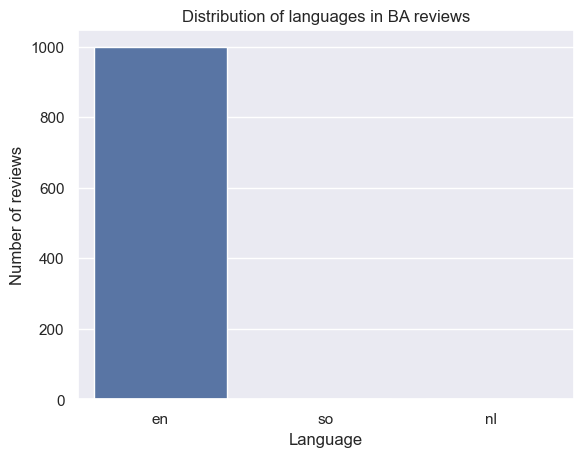

In [ ]:
# display the distribution of languages
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=lang_result_BA)
ax.set_title('Distribution of languages in BA reviews')
ax.set_xlabel('Language')
ax.set_ylabel('Number of reviews')
plt.show()

In [ ]:
# find other language indexes
lang_result_BA.index('so'), lang_result_BA.index('nl')

(561, 578)

In [ ]:
# display other language reviews
print(BA_text[lang_result_BA.index('so')], '\n') #might be english, slowenian, or slovak..
print(BA_text[lang_result_BA.index('nl')], '\n') #likely a typo

 Cask 

 Good not amazing decent bottke 

